In [480]:
#Kaggle 'toy competetion' by Deep Learning School (MIPT)

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### EDA

In [32]:
data = pd.read_csv("train.csv")
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

### Проверка на пропущенные данные

In [383]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [63]:
#сказано, что в TotalSpent есть пропущенные значения (но не Null/NA, a "") заменил пробелы нулями
data['TotalSpent'] = pd.to_numeric(data["TotalSpent"], errors='coerce')
data['TotalSpent'].isna().sum()

9

In [83]:
data['TotalSpent'] = data["TotalSpent"].fillna(0)

data["TotalSpent"] = data["TotalSpent"].astype(float)
data["TotalSpent"].dtype

data['TotalSpent'].isna().sum()

0

### Tinkering with plots

0.26202196137826583


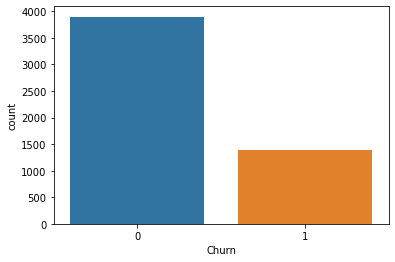

In [385]:
#общее соотношение сбалансированности классов 
sns.countplot(x = 'Churn', data = data)
print(data.Churn.sum()/data.Churn.count())

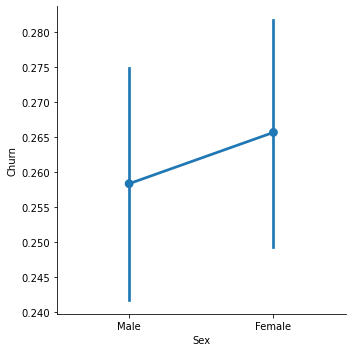

In [386]:
#wild guess о зависимости пола и оттока (не думаю, что здесь есть значимое отличие - можно будет попробовать удалить)
sns.catplot('Sex', 'Churn', kind = 'point', data = data)

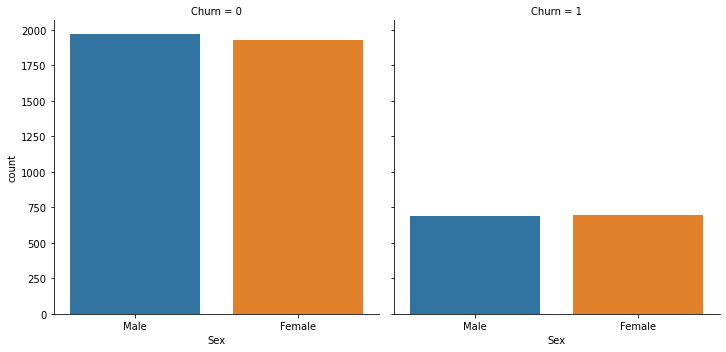

In [387]:
#посмотрим на абсолютные значения 
sns.catplot(x = 'Sex', col = 'Churn', kind = 'count', data = data)

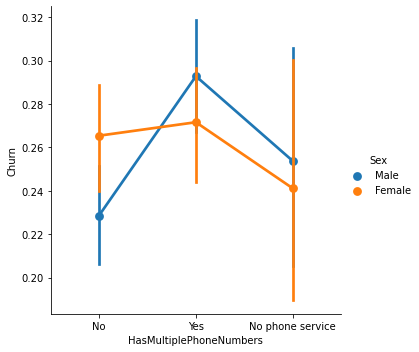

In [388]:
#другое предположение в разрезе пола + нескольких номеров (видно, что таким образом зависимость не найдена)
sns.catplot('HasMultiplePhoneNumbers', 'Churn',hue = 'Sex', kind = 'point', data = data)
#попробуем точно так же посмотреть на наличие нескольких номеров

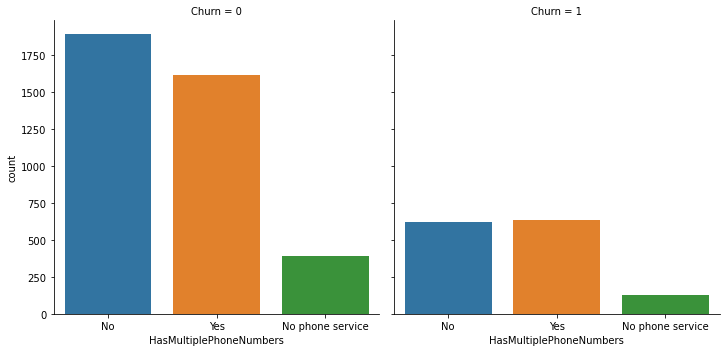

In [389]:
sns.catplot(x = 'HasMultiplePhoneNumbers', col = 'Churn', kind = 'count', data = data)
#уже интереснее, но пока все еще недостаточно

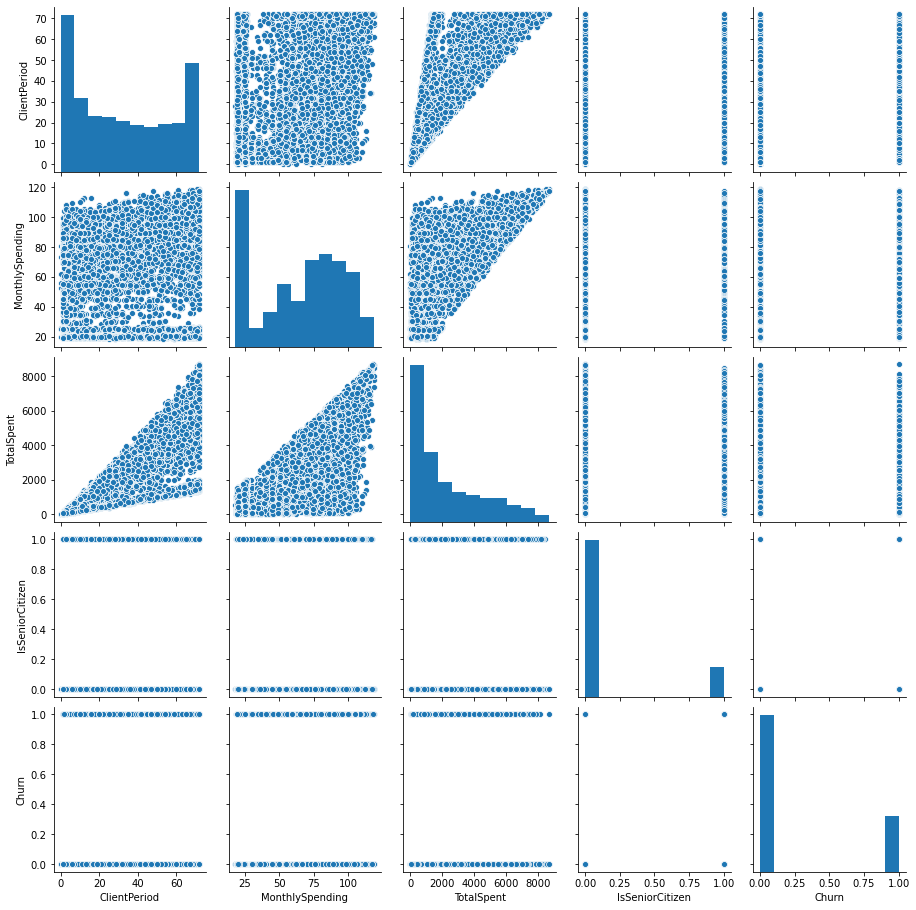

In [88]:
#общее распределение числовых признаков и их зависимость с другими (плюс те, что сформированы из 0 и 1)
sns.pairplot(data = data)

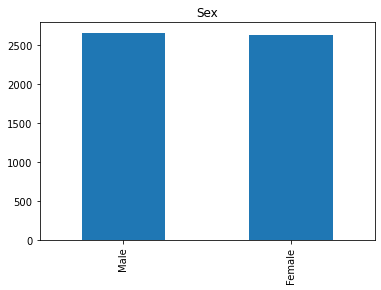

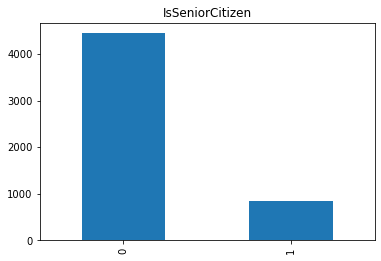

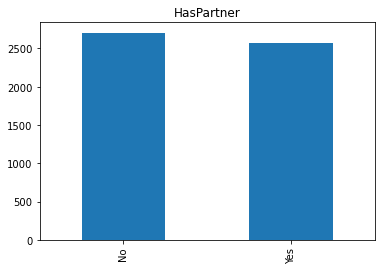

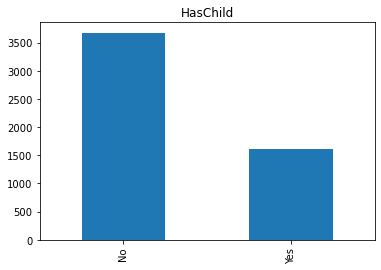

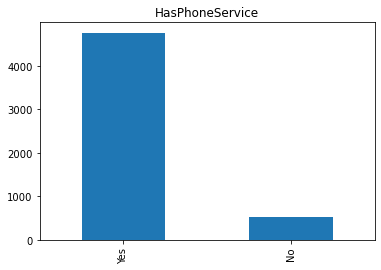

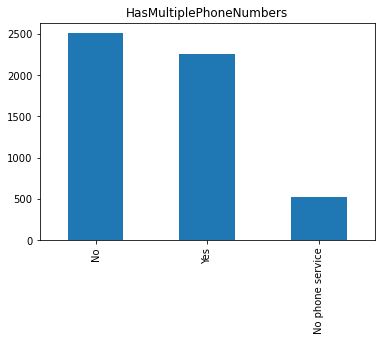

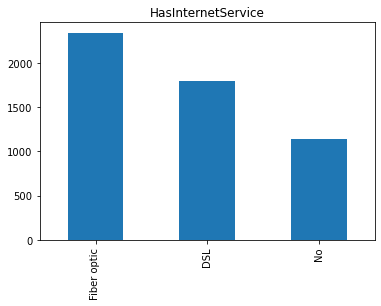

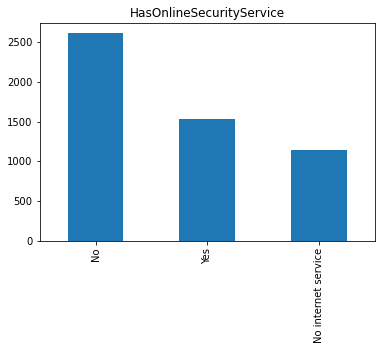

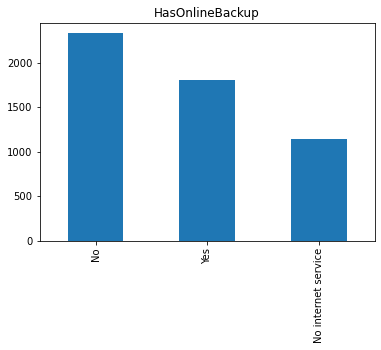

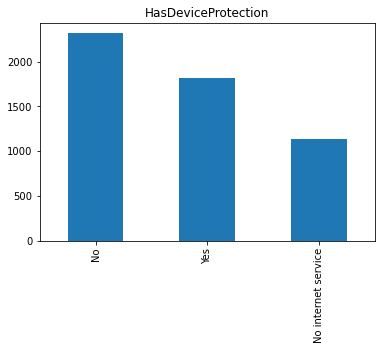

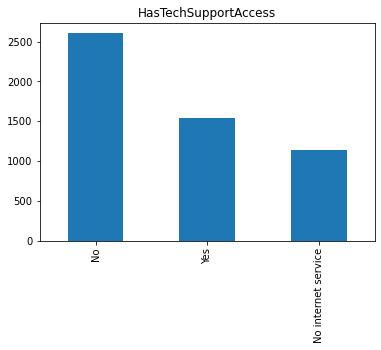

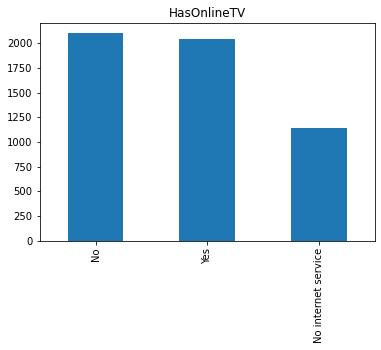

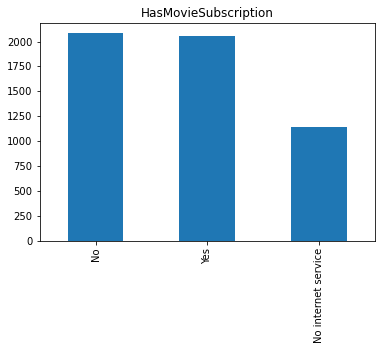

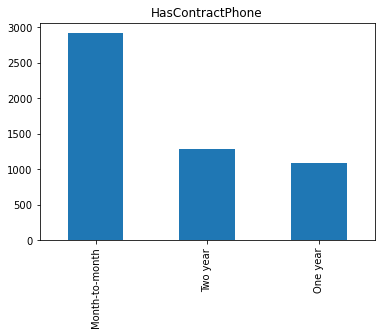

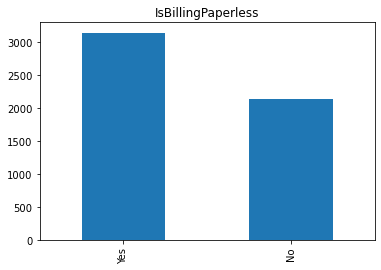

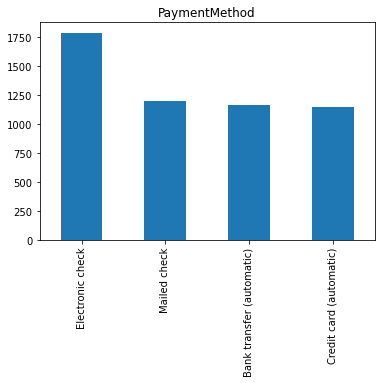

In [123]:
#посмотрим на категориальные признаки и их соотношение
for col in cat_cols:
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.set_title(col)
    data[col].value_counts().plot(kind='bar')

## Применение линейных моделей

#### Обучающая выборка

In [165]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [166]:
#масштабируем числовые признаки
num_data = data[num_cols]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
scaled_data = pd.DataFrame(scaled_data, columns=["ClientPeriod" , "MonthlySpending", "TotalSpent"])
scaled_data

,ClientPeriod,MonthlySpending,TotalSpent
0,0.920767,-1.505447,-0.555852
1,1.613288,-1.294998,-0.183039
2,-1.279005,0.363737,-0.974768
3,-0.016173,0.476418,0.124519
4,1.124450,1.667856,1.970599
...,...,...,...
5277,-1.197532,-1.144204,-0.972013
5278,0.717084,-0.678565,-0.043651
5279,-1.279005,-0.327265,-0.983957
5280,-0.138382,0.367051,-0.031838


In [167]:
#кодируем категориальные признаки

In [168]:
ccc = data[cat_cols]
categ = pd.get_dummies(ccc)
categ.head()

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [169]:
#cклеим отнормированные числовые признаки и закодированные категориальные
X_train = pd.concat([scaled_data, categ], axis = 1)
X_train_lol = X_train.drop("TotalSpent", axis = 1)

#### Обучим лог регрессию

In [239]:
clf = LogisticRegression(C = 10)
y_train = data["Churn"]

In [240]:
clf.fit(X_train, y_train)

LogisticRegression(C=100)

In [241]:
clf.predict(X_train)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [242]:
clf.score(X_train,y_train)

0.8080272624006059

In [243]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

import statsmodels.api as sm 
import statsmodels.formula.api as sf

In [244]:
print(cross_val_score(clf, X_train, y_train, scoring = "roc_auc").mean())

0.8451111355319523


### Подберем "С" с помощью поиска по сетке

In [184]:
parameters = {"C": [100, 10, 1, 0.1, 0.01, 0.001]}
search = GridSearchCV(clf, parameters, cv = 5, scoring = "roc_auc")
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=100, max_iter=400),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [185]:
search.best_params_

{'C': 10}

## Загрузка и предобработка тестовых данных

#### Т.е. делаем те же самые операции, что и с обучающей выборкой

In [192]:
test_data = pd.read_csv("test.csv")
test_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [193]:
test1 = test_data.copy()
test1

test1["TotalSpent"] = test1["TotalSpent"].str.replace(" ","")
test1["TotalSpent"] = test1["TotalSpent"].str.replace("","0")

num_test_data = test1[num_cols]

scaler_test = StandardScaler()
scaled_data_test = scaler.fit_transform(num_test_data)
scaled_data_test = pd.DataFrame(scaled_data_test, columns=["ClientPeriod" , "MonthlySpending", "TotalSpent"])
scaled_data_test

,ClientPeriod,MonthlySpending,TotalSpent
0,0.394782,-0.274027,0.072046
1,-0.133958,1.147644,0.511349
2,-0.947404,0.401602,-0.820886
3,1.411590,0.326160,1.001148
4,1.574279,-1.481107,-0.381217
...,...,...,...
1756,1.574279,1.370619,2.347297
1757,-0.784715,-1.455959,-0.839063
1758,-1.232110,0.911258,-0.843596
1759,-0.540681,0.832463,-0.367896


In [194]:
ccc_test = test1[cat_cols]
categ_test = pd.get_dummies(ccc_test)
categ_test

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,1,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
2,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4,0,1,0,0,1,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,0,1,0,0,1,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
1757,0,1,0,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,1
1758,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1759,0,1,0,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0


In [195]:
X_test = pd.concat([scaled_data_test, categ_test], axis = 1)


## Теперь посмотрим, как работает модель на тестовой выборке

In [196]:
preds = clf.predict(X_test)

In [197]:
submission = pd.read_csv('submission.csv')
submission['Churn'] = clf.predict_proba(X_test)[:,1]
submission.to_csv('my_submission.csv', index = False )

In [344]:
#Получившийся скор на кагл : 0.84696

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

### Попробуем catboost

In [125]:
from catboost import CatBoostClassifier

In [126]:
data2 = pd.read_csv("train.csv")
y_train = data2.Churn 
X_train = data2.drop(["Churn"], axis = 1)

In [127]:
model = CatBoostClassifier(Use)
model.fit(X_train, y_train, cat_features = cat_cols)

Learning rate set to 0.020969
0:	learn: 0.6792901	total: 300ms	remaining: 4m 59s
1:	learn: 0.6650793	total: 383ms	remaining: 3m 11s
2:	learn: 0.6526914	total: 459ms	remaining: 2m 32s
3:	learn: 0.6402692	total: 538ms	remaining: 2m 13s
4:	learn: 0.6297501	total: 588ms	remaining: 1m 57s
5:	learn: 0.6187599	total: 652ms	remaining: 1m 48s
6:	learn: 0.6086345	total: 697ms	remaining: 1m 38s
7:	learn: 0.5994462	total: 748ms	remaining: 1m 32s
8:	learn: 0.5901159	total: 823ms	remaining: 1m 30s
9:	learn: 0.5815636	total: 901ms	remaining: 1m 29s
10:	learn: 0.5734006	total: 969ms	remaining: 1m 27s
11:	learn: 0.5655578	total: 1.05s	remaining: 1m 26s
12:	learn: 0.5592972	total: 1.1s	remaining: 1m 23s
13:	learn: 0.5522571	total: 1.16s	remaining: 1m 22s
14:	learn: 0.5469362	total: 1.21s	remaining: 1m 19s
15:	learn: 0.5409375	total: 1.28s	remaining: 1m 18s
16:	learn: 0.5354807	total: 1.34s	remaining: 1m 17s
17:	learn: 0.5300809	total: 1.41s	remaining: 1m 16s
18:	learn: 0.5243072	total: 1.49s	remaining: 

162:	learn: 0.3940979	total: 9.92s	remaining: 50.9s
163:	learn: 0.3938985	total: 9.98s	remaining: 50.9s
164:	learn: 0.3937892	total: 10s	remaining: 50.7s
165:	learn: 0.3934855	total: 10.1s	remaining: 50.7s
166:	learn: 0.3934124	total: 10.1s	remaining: 50.6s
167:	learn: 0.3933339	total: 10.2s	remaining: 50.4s
168:	learn: 0.3932327	total: 10.3s	remaining: 50.4s
169:	learn: 0.3929676	total: 10.3s	remaining: 50.4s
170:	learn: 0.3927659	total: 10.4s	remaining: 50.4s
171:	learn: 0.3926415	total: 10.4s	remaining: 50.3s
172:	learn: 0.3925068	total: 10.5s	remaining: 50.3s
173:	learn: 0.3923420	total: 10.6s	remaining: 50.3s
174:	learn: 0.3922357	total: 10.7s	remaining: 50.3s
175:	learn: 0.3921151	total: 10.7s	remaining: 50.3s
176:	learn: 0.3920730	total: 10.8s	remaining: 50.1s
177:	learn: 0.3920632	total: 10.8s	remaining: 49.8s
178:	learn: 0.3920037	total: 10.8s	remaining: 49.8s
179:	learn: 0.3918034	total: 10.9s	remaining: 49.8s
180:	learn: 0.3915090	total: 11s	remaining: 49.7s
181:	learn: 0.39

321:	learn: 0.3789455	total: 20.3s	remaining: 42.7s
322:	learn: 0.3788170	total: 20.3s	remaining: 42.6s
323:	learn: 0.3787242	total: 20.4s	remaining: 42.5s
324:	learn: 0.3786607	total: 20.4s	remaining: 42.4s
325:	learn: 0.3785889	total: 20.5s	remaining: 42.4s
326:	learn: 0.3785514	total: 20.6s	remaining: 42.3s
327:	learn: 0.3785030	total: 20.7s	remaining: 42.3s
328:	learn: 0.3784197	total: 20.7s	remaining: 42.2s
329:	learn: 0.3783141	total: 20.8s	remaining: 42.2s
330:	learn: 0.3782359	total: 20.8s	remaining: 42.1s
331:	learn: 0.3781621	total: 20.9s	remaining: 42s
332:	learn: 0.3781596	total: 20.9s	remaining: 41.9s
333:	learn: 0.3781550	total: 20.9s	remaining: 41.7s
334:	learn: 0.3781404	total: 21s	remaining: 41.6s
335:	learn: 0.3780622	total: 21s	remaining: 41.5s
336:	learn: 0.3780353	total: 21.1s	remaining: 41.5s
337:	learn: 0.3780339	total: 21.1s	remaining: 41.4s
338:	learn: 0.3778890	total: 21.2s	remaining: 41.3s
339:	learn: 0.3778048	total: 21.2s	remaining: 41.2s
340:	learn: 0.3777

481:	learn: 0.3651518	total: 32.3s	remaining: 34.7s
482:	learn: 0.3648660	total: 32.4s	remaining: 34.6s
483:	learn: 0.3648228	total: 32.4s	remaining: 34.6s
484:	learn: 0.3646447	total: 32.5s	remaining: 34.5s
485:	learn: 0.3645467	total: 32.6s	remaining: 34.5s
486:	learn: 0.3644127	total: 32.6s	remaining: 34.4s
487:	learn: 0.3643320	total: 32.7s	remaining: 34.3s
488:	learn: 0.3641147	total: 32.8s	remaining: 34.2s
489:	learn: 0.3639625	total: 32.8s	remaining: 34.2s
490:	learn: 0.3638865	total: 32.9s	remaining: 34.1s
491:	learn: 0.3638401	total: 33s	remaining: 34s
492:	learn: 0.3637303	total: 33.1s	remaining: 34s
493:	learn: 0.3636297	total: 33.2s	remaining: 34s
494:	learn: 0.3635022	total: 33.3s	remaining: 34s
495:	learn: 0.3634622	total: 33.4s	remaining: 33.9s
496:	learn: 0.3633370	total: 33.5s	remaining: 33.9s
497:	learn: 0.3632156	total: 33.5s	remaining: 33.8s
498:	learn: 0.3631378	total: 33.6s	remaining: 33.8s
499:	learn: 0.3630473	total: 33.7s	remaining: 33.7s
500:	learn: 0.3629956	

641:	learn: 0.3509307	total: 45s	remaining: 25.1s
642:	learn: 0.3507684	total: 45.1s	remaining: 25s
643:	learn: 0.3506313	total: 45.2s	remaining: 25s
644:	learn: 0.3505629	total: 45.3s	remaining: 24.9s
645:	learn: 0.3504590	total: 45.5s	remaining: 24.9s
646:	learn: 0.3503373	total: 45.6s	remaining: 24.9s
647:	learn: 0.3502393	total: 45.8s	remaining: 24.9s
648:	learn: 0.3501881	total: 45.9s	remaining: 24.8s
649:	learn: 0.3500099	total: 46s	remaining: 24.8s
650:	learn: 0.3499127	total: 46.1s	remaining: 24.7s
651:	learn: 0.3498270	total: 46.2s	remaining: 24.6s
652:	learn: 0.3497782	total: 46.3s	remaining: 24.6s
653:	learn: 0.3496099	total: 46.4s	remaining: 24.5s
654:	learn: 0.3495311	total: 46.5s	remaining: 24.5s
655:	learn: 0.3494323	total: 46.6s	remaining: 24.4s
656:	learn: 0.3493765	total: 46.6s	remaining: 24.3s
657:	learn: 0.3492413	total: 46.7s	remaining: 24.3s
658:	learn: 0.3492183	total: 46.8s	remaining: 24.2s
659:	learn: 0.3490922	total: 46.9s	remaining: 24.1s
660:	learn: 0.349006

802:	learn: 0.3384227	total: 57.2s	remaining: 14s
803:	learn: 0.3383485	total: 57.3s	remaining: 14s
804:	learn: 0.3383167	total: 57.4s	remaining: 13.9s
805:	learn: 0.3382155	total: 57.5s	remaining: 13.8s
806:	learn: 0.3381340	total: 57.5s	remaining: 13.8s
807:	learn: 0.3380321	total: 57.6s	remaining: 13.7s
808:	learn: 0.3379664	total: 57.7s	remaining: 13.6s
809:	learn: 0.3378454	total: 57.8s	remaining: 13.5s
810:	learn: 0.3378185	total: 57.8s	remaining: 13.5s
811:	learn: 0.3377367	total: 57.9s	remaining: 13.4s
812:	learn: 0.3376534	total: 58s	remaining: 13.3s
813:	learn: 0.3376468	total: 58.1s	remaining: 13.3s
814:	learn: 0.3375739	total: 58.2s	remaining: 13.2s
815:	learn: 0.3375264	total: 58.3s	remaining: 13.1s
816:	learn: 0.3374242	total: 58.3s	remaining: 13.1s
817:	learn: 0.3373334	total: 58.4s	remaining: 13s
818:	learn: 0.3372619	total: 58.4s	remaining: 12.9s
819:	learn: 0.3371705	total: 58.5s	remaining: 12.8s
820:	learn: 0.3371149	total: 58.6s	remaining: 12.8s
821:	learn: 0.337086

960:	learn: 0.3268223	total: 1m 13s	remaining: 2.98s
961:	learn: 0.3267397	total: 1m 13s	remaining: 2.9s
962:	learn: 0.3266485	total: 1m 13s	remaining: 2.82s
963:	learn: 0.3265690	total: 1m 13s	remaining: 2.75s
964:	learn: 0.3265272	total: 1m 13s	remaining: 2.67s
965:	learn: 0.3264649	total: 1m 13s	remaining: 2.6s
966:	learn: 0.3263331	total: 1m 13s	remaining: 2.52s
967:	learn: 0.3262541	total: 1m 13s	remaining: 2.44s
968:	learn: 0.3261842	total: 1m 13s	remaining: 2.37s
969:	learn: 0.3261381	total: 1m 14s	remaining: 2.29s
970:	learn: 0.3260237	total: 1m 14s	remaining: 2.21s
971:	learn: 0.3259899	total: 1m 14s	remaining: 2.14s
972:	learn: 0.3259124	total: 1m 14s	remaining: 2.06s
973:	learn: 0.3257766	total: 1m 14s	remaining: 1.99s
974:	learn: 0.3257363	total: 1m 14s	remaining: 1.91s
975:	learn: 0.3256737	total: 1m 14s	remaining: 1.83s
976:	learn: 0.3255897	total: 1m 14s	remaining: 1.76s
977:	learn: 0.3254934	total: 1m 14s	remaining: 1.68s
978:	learn: 0.3254497	total: 1m 14s	remaining: 1

In [130]:
model.score(X_train, y_train)

0.8349110185535782

In [216]:
#избавимся от неинформативных признаков и попробуем немного изменить параметры
cat_test = pd.read_csv("test.csv")
X_tr_new = data.drop(["Sex", "HasChild", "Churn"], axis = 1)
cat_test_new = cat_test.copy()
cat_test_new = cat_test.drop(["Sex", "HasChild"], axis = 1)

In [141]:
new_cat_cols = [
    'IsSeniorCitizen',
    'HasPartner',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

In [229]:
model = CatBoostClassifier()
model.fit(X_tr_new, y_train, cat_features = new_cat_cols, use_best_model=True)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.020969
0:	learn: 0.6795145	total: 75.1ms	remaining: 1m 15s
1:	learn: 0.6664998	total: 119ms	remaining: 59.4s
2:	learn: 0.6538165	total: 182ms	remaining: 1m
3:	learn: 0.6411679	total: 255ms	remaining: 1m 3s
4:	learn: 0.6296447	total: 320ms	remaining: 1m 3s
5:	learn: 0.6188781	total: 382ms	remaining: 1m 3s
6:	learn: 0.6087598	total: 467ms	remaining: 1m 6s
7:	learn: 0.5990700	total: 609ms	remaining: 1m 15s
8:	learn: 0.5892403	total: 710ms	remaining: 1m 18s
9:	learn: 0.5808280	total: 762ms	remaining: 1m 15s
10:	learn: 0.5722491	total: 824ms	remaining: 1m 14s
11:	learn: 0.5642266	total: 865ms	remaining: 1m 11s
12:	learn: 0.5574292	total: 907ms	remaining: 1m 8s
13:	learn: 0.5506983	total: 994ms	remaining: 1m 9s
14:	learn: 0.5441428	total: 1.07s	remaining: 1m 10s
15:	learn: 0.5378625	total: 1.17s	remaining: 1m 12s
16:	learn: 0.5315503	total: 1.23s	remaining: 1m 10s
17:	learn: 0.5258199	total: 1.29s	remaining: 1m 10s
18:	learn: 0.5207431	total: 1.38s	remaining: 1m 11s
19

162:	learn: 0.3947928	total: 11.8s	remaining: 1m
163:	learn: 0.3947204	total: 11.9s	remaining: 1m
164:	learn: 0.3945967	total: 12s	remaining: 1m
165:	learn: 0.3944757	total: 12.1s	remaining: 1m
166:	learn: 0.3943746	total: 12.1s	remaining: 1m
167:	learn: 0.3941435	total: 12.3s	remaining: 1m
168:	learn: 0.3939632	total: 12.4s	remaining: 1m
169:	learn: 0.3938716	total: 12.5s	remaining: 1m
170:	learn: 0.3937126	total: 12.6s	remaining: 1m
171:	learn: 0.3936302	total: 12.6s	remaining: 1m
172:	learn: 0.3936212	total: 12.7s	remaining: 1m
173:	learn: 0.3933821	total: 12.7s	remaining: 1m
174:	learn: 0.3932563	total: 12.8s	remaining: 1m
175:	learn: 0.3931825	total: 13s	remaining: 1m
176:	learn: 0.3931164	total: 13s	remaining: 1m
177:	learn: 0.3929214	total: 13.1s	remaining: 1m
178:	learn: 0.3928297	total: 13.1s	remaining: 1m
179:	learn: 0.3927461	total: 13.2s	remaining: 1m
180:	learn: 0.3926370	total: 13.3s	remaining: 1m
181:	learn: 0.3925749	total: 13.4s	remaining: 1m
182:	learn: 0.3924304	tota

325:	learn: 0.3811232	total: 24.4s	remaining: 50.4s
326:	learn: 0.3811232	total: 24.4s	remaining: 50.2s
327:	learn: 0.3809761	total: 24.5s	remaining: 50.1s
328:	learn: 0.3809746	total: 24.5s	remaining: 49.9s
329:	learn: 0.3808703	total: 24.5s	remaining: 49.8s
330:	learn: 0.3808702	total: 24.6s	remaining: 49.6s
331:	learn: 0.3806329	total: 24.6s	remaining: 49.5s
332:	learn: 0.3805756	total: 24.7s	remaining: 49.5s
333:	learn: 0.3805530	total: 24.8s	remaining: 49.4s
334:	learn: 0.3805099	total: 24.8s	remaining: 49.3s
335:	learn: 0.3804702	total: 24.9s	remaining: 49.2s
336:	learn: 0.3804221	total: 25s	remaining: 49.2s
337:	learn: 0.3804220	total: 25s	remaining: 49s
338:	learn: 0.3803931	total: 25.1s	remaining: 49s
339:	learn: 0.3802981	total: 25.2s	remaining: 48.9s
340:	learn: 0.3802844	total: 25.3s	remaining: 48.8s
341:	learn: 0.3801865	total: 25.3s	remaining: 48.7s
342:	learn: 0.3801459	total: 25.4s	remaining: 48.7s
343:	learn: 0.3800827	total: 25.5s	remaining: 48.7s
344:	learn: 0.379986

484:	learn: 0.3689446	total: 38.9s	remaining: 41.4s
485:	learn: 0.3688872	total: 39s	remaining: 41.3s
486:	learn: 0.3687545	total: 39.1s	remaining: 41.2s
487:	learn: 0.3686965	total: 39.1s	remaining: 41.1s
488:	learn: 0.3686537	total: 39.2s	remaining: 41s
489:	learn: 0.3685523	total: 39.3s	remaining: 40.9s
490:	learn: 0.3684690	total: 39.4s	remaining: 40.8s
491:	learn: 0.3684097	total: 39.4s	remaining: 40.7s
492:	learn: 0.3683151	total: 39.5s	remaining: 40.6s
493:	learn: 0.3681879	total: 39.6s	remaining: 40.6s
494:	learn: 0.3680150	total: 39.7s	remaining: 40.5s
495:	learn: 0.3678529	total: 39.8s	remaining: 40.4s
496:	learn: 0.3677902	total: 39.8s	remaining: 40.3s
497:	learn: 0.3677106	total: 39.9s	remaining: 40.2s
498:	learn: 0.3676357	total: 40s	remaining: 40.2s
499:	learn: 0.3675941	total: 40.1s	remaining: 40.1s
500:	learn: 0.3674847	total: 40.2s	remaining: 40.1s
501:	learn: 0.3674127	total: 40.3s	remaining: 40s
502:	learn: 0.3672920	total: 40.4s	remaining: 39.9s
503:	learn: 0.367206

645:	learn: 0.3550829	total: 51.7s	remaining: 28.3s
646:	learn: 0.3550411	total: 51.7s	remaining: 28.2s
647:	learn: 0.3549534	total: 51.8s	remaining: 28.1s
648:	learn: 0.3548863	total: 51.9s	remaining: 28s
649:	learn: 0.3548088	total: 51.9s	remaining: 28s
650:	learn: 0.3547816	total: 52s	remaining: 27.9s
651:	learn: 0.3547559	total: 52s	remaining: 27.8s
652:	learn: 0.3547185	total: 52.1s	remaining: 27.7s
653:	learn: 0.3545791	total: 52.2s	remaining: 27.6s
654:	learn: 0.3545473	total: 52.2s	remaining: 27.5s
655:	learn: 0.3544808	total: 52.4s	remaining: 27.5s
656:	learn: 0.3543123	total: 52.5s	remaining: 27.4s
657:	learn: 0.3542745	total: 52.7s	remaining: 27.4s
658:	learn: 0.3542322	total: 52.7s	remaining: 27.3s
659:	learn: 0.3542103	total: 52.8s	remaining: 27.2s
660:	learn: 0.3541174	total: 52.9s	remaining: 27.1s
661:	learn: 0.3540381	total: 53s	remaining: 27.1s
662:	learn: 0.3540119	total: 53s	remaining: 27s
663:	learn: 0.3539603	total: 53.1s	remaining: 26.9s
664:	learn: 0.3538272	tota

805:	learn: 0.3437286	total: 1m 5s	remaining: 15.7s
806:	learn: 0.3436591	total: 1m 5s	remaining: 15.6s
807:	learn: 0.3435826	total: 1m 5s	remaining: 15.5s
808:	learn: 0.3435070	total: 1m 5s	remaining: 15.4s
809:	learn: 0.3434303	total: 1m 5s	remaining: 15.3s
810:	learn: 0.3434099	total: 1m 5s	remaining: 15.3s
811:	learn: 0.3433538	total: 1m 5s	remaining: 15.2s
812:	learn: 0.3432447	total: 1m 5s	remaining: 15.1s
813:	learn: 0.3431819	total: 1m 5s	remaining: 15s
814:	learn: 0.3431281	total: 1m 5s	remaining: 15s
815:	learn: 0.3430226	total: 1m 5s	remaining: 14.9s
816:	learn: 0.3428483	total: 1m 6s	remaining: 14.8s
817:	learn: 0.3427821	total: 1m 6s	remaining: 14.7s
818:	learn: 0.3427439	total: 1m 6s	remaining: 14.6s
819:	learn: 0.3426296	total: 1m 6s	remaining: 14.6s
820:	learn: 0.3425832	total: 1m 6s	remaining: 14.5s
821:	learn: 0.3425663	total: 1m 6s	remaining: 14.4s
822:	learn: 0.3425077	total: 1m 6s	remaining: 14.3s
823:	learn: 0.3424235	total: 1m 6s	remaining: 14.3s
824:	learn: 0.34

962:	learn: 0.3329824	total: 1m 19s	remaining: 3.04s
963:	learn: 0.3329701	total: 1m 19s	remaining: 2.96s
964:	learn: 0.3328230	total: 1m 19s	remaining: 2.88s
965:	learn: 0.3327575	total: 1m 19s	remaining: 2.8s
966:	learn: 0.3327400	total: 1m 19s	remaining: 2.71s
967:	learn: 0.3325788	total: 1m 19s	remaining: 2.63s
968:	learn: 0.3324648	total: 1m 19s	remaining: 2.55s
969:	learn: 0.3323774	total: 1m 19s	remaining: 2.47s
970:	learn: 0.3322368	total: 1m 19s	remaining: 2.38s
971:	learn: 0.3321344	total: 1m 19s	remaining: 2.3s
972:	learn: 0.3320857	total: 1m 19s	remaining: 2.22s
973:	learn: 0.3320041	total: 1m 20s	remaining: 2.14s
974:	learn: 0.3319595	total: 1m 20s	remaining: 2.05s
975:	learn: 0.3319049	total: 1m 20s	remaining: 1.97s
976:	learn: 0.3318476	total: 1m 20s	remaining: 1.89s
977:	learn: 0.3317391	total: 1m 20s	remaining: 1.81s
978:	learn: 0.3317078	total: 1m 20s	remaining: 1.72s
979:	learn: 0.3316096	total: 1m 20s	remaining: 1.64s
980:	learn: 0.3315651	total: 1m 20s	remaining: 1

In [230]:
model.score(X_tr_new, y_train)

0.8330177962892844

In [232]:
model.predict(cat_test_new)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [233]:
print(model.predict_proba(data=cat_test_new))

[[0.96194929 0.03805071]
 [0.28855472 0.71144528]
 [0.3276861  0.6723139 ]
 ...
 [0.1309284  0.8690716 ]
 [0.44281439 0.55718561]
 [0.99294196 0.00705804]]


In [234]:
submission['Churn'] = model.predict_proba(data=cat_test_new)[:,1]
submission.to_csv('my_submission.csv', index = False)

In [502]:
#в итоге катбуст с такими параметрами дал небольшое улучшение по скору : 0.85101

In [226]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,TotalSpent,16.026008
1,MonthlySpending,15.874674
2,ClientPeriod,12.119888
3,PaymentMethod,8.032556
4,HasContractPhone,7.085040
5,HasMultiplePhoneNumbers,5.273207
6,HasInternetService,4.861548
7,HasOnlineBackup,4.734749
8,HasOnlineSecurityService,4.258991
9,HasDeviceProtection,3.707982


In [1]:
#можно попробовать и далее экспериментировать, но в рамках задания (получить скор >= 0.84) цель достингута.